### iris数据集，花分类，sklearn，
wangzhi
Iris一共包含150个样本，分为3类，每类50个数据，每个数据包含4个属性。可通过花萼长度，花萼宽度，花瓣长度，花瓣宽度4个属性预测鸢尾花卉属于（Setosa，Versicolour，Virginica）三个种类中的哪一类。

In [4]:
#-*- coding:utf-8 -*-

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn import datasets

import matplotlib.pyplot as plt



In [6]:
iris = datasets.load_iris()
# data对应了样本的4个特征，150行4列
print('>> shape of data:')
print(iris.data.shape)

# 显示样本特征的前5行
print('>> line top 5:')
print(iris.data[:5])

# target对应了样本的类别（目标属性），150行1列
print('>> shape of target:')
print(iris.target.shape)

# 显示所有样本的目标属性
print('>> show target of data:')
print(iris.target)
iris

>> shape of data:
(150, 4)
>> line top 5:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
>> shape of target:
(150,)
>> show target of data:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [10]:
X_train = iris.data
y_train = iris.target
print(np.shape(X_train))
iris['feature_names']

(150, 4)


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

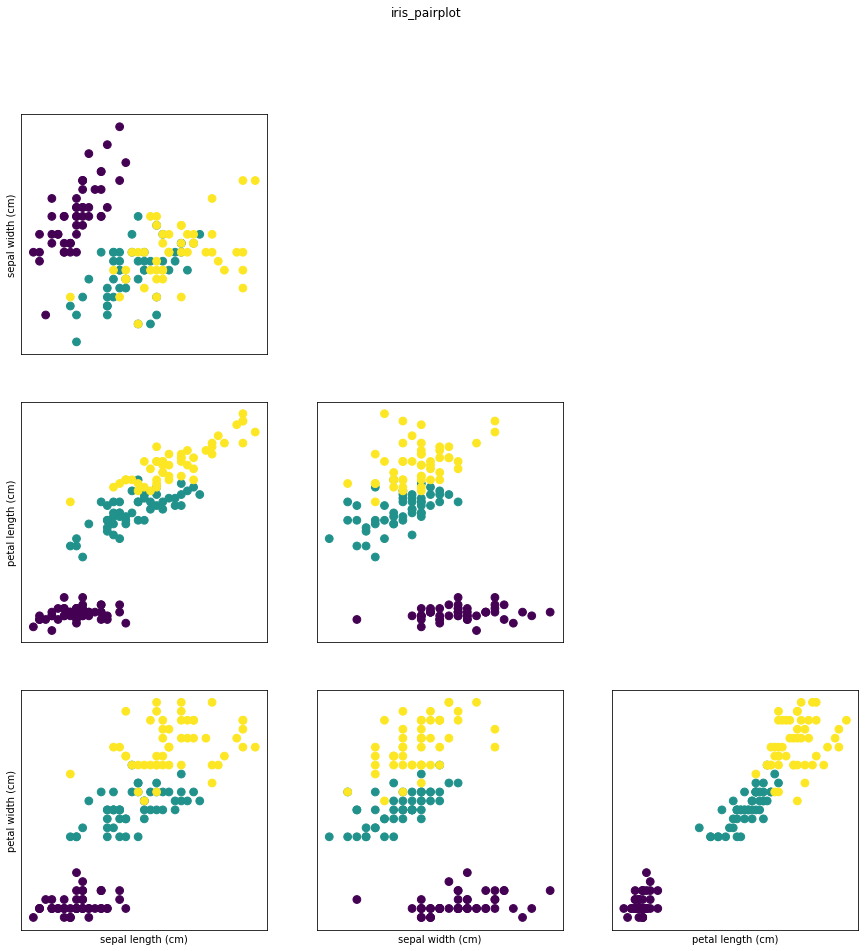

In [13]:
##iris数据库可视化


fig, ax = plt.subplots(3, 3, figsize=(15, 15))
plt.suptitle("iris_pairplot")
for i in range(3):
    for j in range(3):
        #c color s sample
        ax[i, j].scatter(X_train[:, j], X_train[:, i + 1], c=y_train, s=60)
        #刻度位置
        ax[i, j].set_xticks(())
        ax[i, j].set_yticks(())
        if i == 2:
            ax[i, j].set_xlabel(iris['feature_names'][j])
        if j == 0:
            ax[i, j].set_ylabel(iris['feature_names'][i + 1])
        if j > i:
            ax[i, j].set_visible(False)
plt.show()


In [14]:

def load_data():
    iris = datasets.load_iris()
    return iris.data,iris.target

In [17]:
def model(x,y,loss,penalty,l1_ratio,max_iter,tol):
    '''
    解释：sgd分类器  
    cv   
    l1
    
    '''
    
    classifier = SGDClassifier(
    loss=loss,
        penalty=penalty,
        l1_ratio=l1_ratio,
        max_iter=max_iter,
        tol=tol,
    
    )
    #模型对象来 fit 5 kfold 交叉验证，会出k个结果，取平均即可  通常验证相同模型不同参数的模型，同时防止过拟合
    return cross_val_score(classifier,X,y,cv=5)

In [18]:
#参数设置
max_iter=1000
# (1-l1ratio)*l2 +ratio*l1
l1_ratio = 1.0
#对范数 l1和l2 组合的 惩罚
penalty='elasticnet'
#早停规则，两次训练的损失值 之差小于  即停止训练
tol = 0.001
# 损失函数，
#log 逻辑回归 结果概率值
#hinge 线性svm
loss= 'log'




In [19]:
X,y=load_data()

In [20]:
accuracies =  model(X,y,loss,penalty,l1_ratio,max_iter,tol)

In [21]:
accuracies

array([1.        , 0.66666667, 0.73333333, 0.73333333, 0.66666667])

In [32]:
accuracy_mean,accuracy_std = (np.mean(accuracies),np.std(accuracies))

In [33]:
print('Accuracy:{} +/- {}'.format(accuracy_mean,accuracy_std))

Accuracy:0.6466666666666667 +/- 0.0805536398239638
